In [35]:
# 数据集总结
print("\n数据集总结:")
print("="*50)

if 'parquet_files' in locals():
    print(f"总文件数: {len(parquet_files)}")
    
if 'df' in locals():
    print(f"当前加载文件的样本数: {len(df)}")
    print(f"列名: {list(df.columns)}")

print("="*50)
print("分析完成")


数据集总结:
总文件数: 74
当前加载文件的样本数: 6579
列名: ['id', 'code', 'caption', 'image', 'caption_length', 'code_lines']
分析完成


In [37]:
# 显示更多统计信息
print("\n扩展统计分析:")
print("="*50)

# Caption长度统计
if 'caption_length' in df.columns:
    print(f"Caption长度统计:")
    print(f"  最小长度: {df['caption_length'].min()}")
    print(f"  最大长度: {df['caption_length'].max()}")
    print(f"  平均长度: {df['caption_length'].mean():.2f}")
    print(f"  中位数长度: {df['caption_length'].median():.2f}")

# Code行数统计
if 'code_lines' in df.columns:
    print(f"\nCode行数统计:")
    print(f"  最小行数: {df['code_lines'].min()}")
    print(f"  最大行数: {df['code_lines'].max()}")
    print(f"  平均行数: {df['code_lines'].mean():.2f}")
    print(f"  中位数行数: {df['code_lines'].median():.2f}")

# 缺失值统计
print(f"\n缺失值统计:")
missing_data = df.isnull().sum()
for col, count in missing_data.items():
    if count > 0:
        print(f"  {col}: {count} ({count/len(df)*100:.2f}%)")
    else:
        print(f"  {col}: 无缺失")

# 唯一值统计
print(f"\n唯一值统计:")
print(f"  总样本数: {len(df)}")
print(f"  唯一ID数: {df['id'].nunique() if 'id' in df.columns else 'N/A'}")
if 'caption' in df.columns:
    unique_captions = df['caption'].nunique()
    print(f"  唯一Caption数: {unique_captions} ({unique_captions/len(df)*100:.2f}%)")
if 'code' in df.columns:
    unique_codes = df['code'].nunique()
    print(f"  唯一Code数: {unique_codes} ({unique_codes/len(df)*100:.2f}%)")

print("="*50)


扩展统计分析:
Caption长度统计:
  最小长度: 25
  最大长度: 916
  平均长度: 340.91
  中位数长度: 326.00

Code行数统计:
  最小行数: 1
  最大行数: 1
  平均行数: 1.00
  中位数行数: 1.00

缺失值统计:
  id: 无缺失
  code: 无缺失
  caption: 无缺失
  image: 无缺失
  caption_length: 无缺失
  code_lines: 无缺失

唯一值统计:
  总样本数: 6579
  唯一ID数: 6401
  唯一Caption数: 6576 (99.95%)
  唯一Code数: 1 (0.02%)


In [38]:
# 显示包含code和图像的样本
import textwrap

print("\n显示样本数据 (code + 图像):")
print("="*50)

# 筛选出同时包含code和image的样本
if 'code' in df.columns and 'image' in df.columns:
    complete_samples = df.dropna(subset=['code'])
    if 'image' in df.columns:
        complete_samples = complete_samples[complete_samples['image'].notnull()]
    
    print(f"同时包含code和image的样本数: {len(complete_samples)}")
    
    if len(complete_samples) > 0:
        # 随机选择几个样本显示
        sample_data = complete_samples.sample(n=min(3, len(complete_samples)), random_state=42)
        
        for idx, (i, row) in enumerate(sample_data.iterrows()):
            print(f"\n--- 样本 {idx+1} ---")
            
            # 显示ID
            if 'id' in row:
                print(f"ID: {row['id']}")
            
            # 显示Caption
            if 'caption' in row and row['caption']:
                print(f"Caption: {row['caption']}")
            
            # 显示Code (限制显示长度)
            if 'code' in row and row['code']:
                print("\nCode:")
                code_text = row['code']
                # 如果代码太长，截取前几行和后几行
                code_lines = code_text.split('\n')
                if len(code_lines) > 20:
                    print("  " + "\n  ".join(code_lines[:10]))
                    print("  ... (省略中间部分)")
                    print("  " + "\n  ".join(code_lines[-10:]))
                else:
                    print("  " + "\n  ".join(code_lines))
            
            # 显示图像信息
            if 'image' in row and row['image'] is not None:
                try:
                    image_info = row['image']
                    print(f"\n图像信息:")
                    print(f"  类型: {type(image_info)}")
                    if hasattr(image_info, 'keys'):
                        for key in image_info.keys():
                            if key != 'bytes':
                                print(f"  {key}: {image_info[key]}")
                    if 'bytes' in image_info:
                        print(f"  数据大小: {len(image_info['bytes'])} 字节")
                    else:
                        print(f"  数据大小: {len(str(image_info))} 字符")
                except Exception as e:
                    print(f"\n图像信息: 无法解析 ({str(e)})")
            else:
                print(f"\n图像信息: 不存在")
            
            print("-" * 30)
    else:
        print("没有同时包含code和image的样本")
else:
    print("数据集中缺少code或image列")

print("="*50)


显示样本数据 (code + 图像):
同时包含code和image的样本数: 6579

--- 样本 1 ---
ID: mavis_60513
Caption: A rectangle ABCD is created with CD as the diameter. A semicircle is drawn outside the rectangle, and CD is removed. Adjacent to edge AD, a rectangle ADEF is drawn, extending side EF to create an external equilateral triangle, with side EF then removed. A square EDHI and its inscribed circle are attached to edge ED. Bordering edge HD, a rectangle HDJK is drawn. Angle BAD is 90°, and the measure of angle DAF is equal to 90°. Angle DEI and DHK are also 90°. Side AB measures 8.0 units in length, and the distance between points A and D is 11.0. The segment ED has a length of 12.0, and side HD covers a distance of 12.0 units.

图像信息:
  类型: <class 'dict'>
  path: None
  数据大小: 48376 字节
------------------------------

--- 样本 2 ---
ID: mavis_85683
Caption: Firstly, portray a Parallelogram ABCD. Secondly, attached to edge AD, draw a Rectangle ADEF, with EF as the diameter, draw a semicircle outside the rectangle 


尝试显示图像样本:


/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_6063/2440991188.py:36: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_6063/2440991188.py:36: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


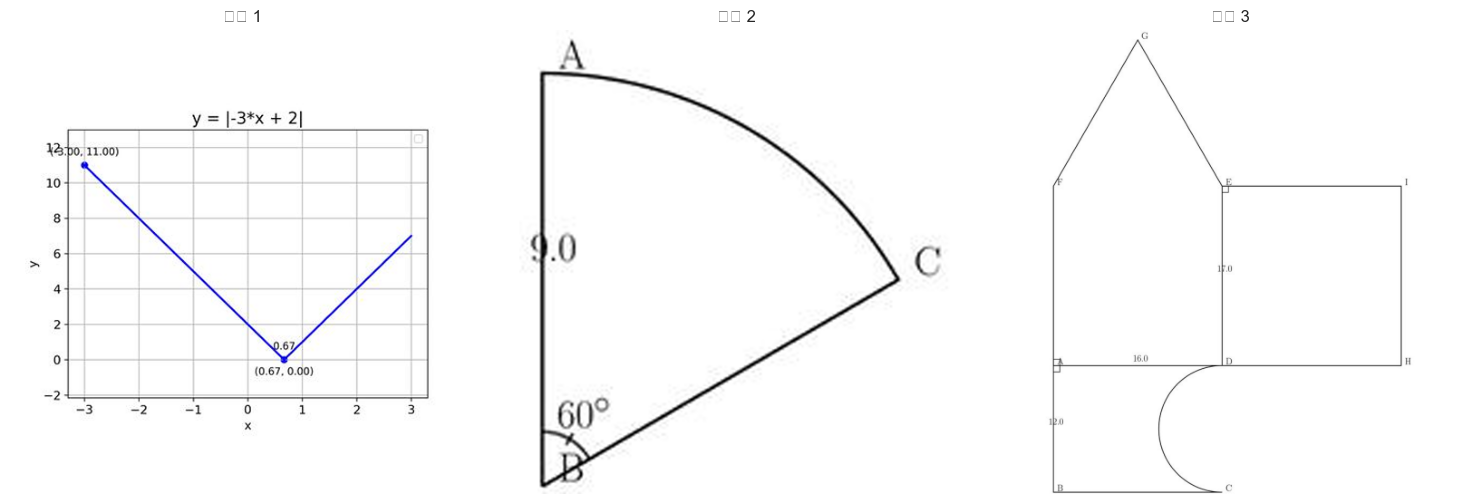

In [39]:
# 显示图像样本（如果可能）
if 'df' in locals() and 'image' in df.columns:
    # 筛选出有图像的样本
    image_samples = df[df['image'].notnull()]
    
    if len(image_samples) > 0:
        print("\n尝试显示图像样本:")
        sample_df = image_samples.sample(n=min(3, len(image_samples)), random_state=24)
        
        fig, axes = plt.subplots(1, min(3, len(sample_df)), figsize=(15, 5))
        if min(3, len(sample_df)) == 1:
            axes = [axes]
        
        for i in range(len(sample_df)):
            row = sample_df.iloc[i]
            if 'image' in row and row['image'] is not None:
                try:
                    # 从字节数据创建图像
                    image_bytes = row['image']['bytes']
                    image_buffer = BytesIO(image_bytes)
                    img = Image.open(image_buffer)
                    
                    # 显示图像
                    axes[i].imshow(img)
                    axes[i].set_title(f'样本 {i+1}')
                    axes[i].axis('off')
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'无法显示\n图像 {i+1}\n错误: {str(e)[:20]}', 
                                ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f'无图像数据\n样本 {i+1}', 
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n数据集中没有可用的图像数据")